# Pipeline de visualisation et EDA - `flood.csv`

Ce notebook contient une pipeline d'exploration des données (EDA) et de visualisations pour le fichier `flood.csv`.
Étapes :
- Charger les données
- Vérifier la structure et les valeurs manquantes
- Visualiser la distribution de `FloodProbability`
- Explorer les corrélations entre les variables et `FloodProbability`
- Graphiques détaillés (histogrammes, heatmap, scatter + régression)
- Conclusion et pistes suivantes

In [15]:
# Imports et configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
# Chargement des données
df = pd.read_csv("datasets/flood.csv")
print('Taille du dataset :', df.shape)
display(df.head())

# Aperçu des types et valeurs manquantes
print('Info:')
display(df.info())
print('Description numérique:')
display(df.describe().T)

# Comptage des valeurs manquantes
missing = df.isnull().sum()
display(missing[missing>0])

Taille du dataset : (50000, 21)


MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  Landslides  \
0              2  ...               10                     7           4   
1              4  ...                9                     2           6   
2              9  ...                7                     4           4   
3              4  ...                4                     2           6   
4              5  ...                7                     6           5   

   Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0           2                            3                4            3   
1           2                            1                1            9   
2           8                            6                1            8   
3           6                            8                8            6   
4           3                            3                4            4   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   2                 6             0.450  
1                   1                 3             0.475  
2                   3                 6             0.515  
3                   6                10             0.520  
4                   3                 4             0.475  

[5 rows x 21 columns]

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulne

None

Description numérique:


count     mean       std    min    25%  \
MonsoonIntensity                 50000.0  4.99148  2.236834  0.000  3.000   
TopographyDrainage               50000.0  4.98410  2.246488  0.000  3.000   
RiverManagement                  50000.0  5.01594  2.231310  0.000  3.000   
Deforestation                    50000.0  5.00848  2.222743  0.000  3.000   
Urbanization                     50000.0  4.98906  2.243159  0.000  3.000   
ClimateChange                    50000.0  4.98834  2.226761  0.000  3.000   
DamsQuality                      50000.0  5.01536  2.245000  0.000  3.000   
Siltation                        50000.0  4.98860  2.232642  0.000  3.000   
AgriculturalPractices            50000.0  5.00612  2.234588  0.000  3.000   
Encroachments                    50000.0  5.00638  2.241633  0.000  3.000   
IneffectiveDisasterPreparedness  50000.0  5.00502  2.226076  0.000  3.000   
DrainageSystems                  50000.0  5.00606  2.238107  0.000  3.000   
CoastalVulnerability             50000.0  4.99992  2.247101  0.000  3.000   
Landslides                       50000.0  4.98422  2.227741  0.000  3.000   
Watersheds                       50000.0  4.97982  2.232190  0.000  3.000   
DeterioratingInfrastructure      50000.0  4.98820  2.231134  0.000  3.000   
PopulationScore                  50000.0  4.98498  2.238279  0.000  3.000   
WetlandLoss                      50000.0  5.00512  2.231760  0.000  3.000   
InadequatePlanning               50000.0  4.99436  2.230011  0.000  3.000   
PoliticalFactors                 50000.0  4.99052  2.246075  0.000  3.000   
FloodProbability                 50000.0  0.49966  0.050034  0.285  0.465   

                                 50%    75%     max  
MonsoonIntensity                 5.0  6.000  16.000  
TopographyDrainage               5.0  6.000  18.000  
RiverManagement                  5.0  6.000  16.000  
Deforestation                    5.0  6.000  17.000  
Urbanization                     5.0  6.000  17.000  
ClimateChange                    5.0  6.000  17.000  
DamsQuality                      5.0  6.000  16.000  
Siltation                        5.0  6.000  16.000  
AgriculturalPractices            5.0  6.000  16.000  
Encroachments                    5.0  6.000  18.000  
IneffectiveDisasterPreparedness  5.0  6.000  16.000  
DrainageSystems                  5.0  6.000  17.000  
CoastalVulnerability             5.0  6.000  17.000  
Landslides                       5.0  6.000  16.000  
Watersheds                       5.0  6.000  16.000  
DeterioratingInfrastructure      5.0  6.000  17.000  
PopulationScore                  5.0  6.000  19.000  
WetlandLoss                      5.0  6.000  22.000  
InadequatePlanning               5.0  6.000  16.000  
PoliticalFactors                 5.0  6.000  16.000  
FloodProbability                 0.5  0.535   0.725

Series([], dtype: int64)

: 

### Vérification de la cible FloodProbability et analyse détaillée des valeurs manquantes

Nous allons examiner la distribution de la cible, le pattern des valeurs manquantes, et la typologie des variables pour guider la modélisation.

Résumé de FloodProbability:


count    50000.000000
mean         0.499660
std          0.050034
min          0.285000
25%          0.465000
50%          0.500000
75%          0.535000
max          0.725000
Name: FloodProbability, dtype: float64


Nombre de valeurs manquantes dans FloodProbability: 0


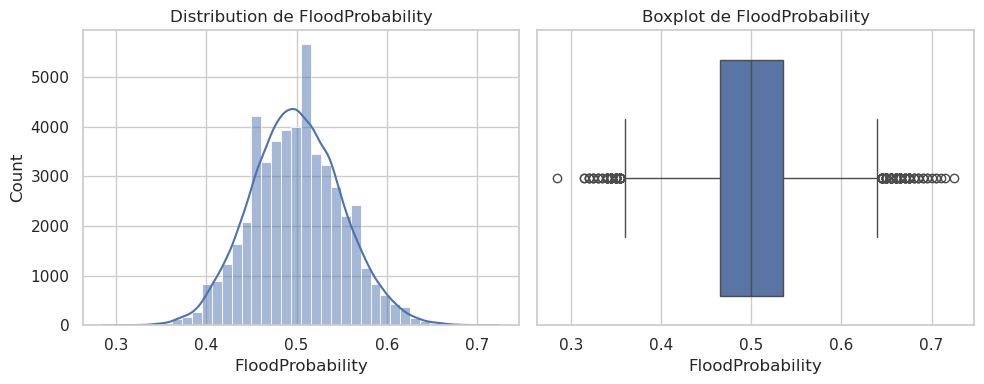

: 

In [ ]:
# Vérification de la cible FloodProbability
if 'FloodProbability' not in df.columns:
    raise ValueError("La colonne 'FloodProbability' est absente du dataset.")

print("Résumé de FloodProbability:")
display(df['FloodProbability'].describe())
print("\nNombre de valeurs manquantes dans FloodProbability:", df['FloodProbability'].isna().sum())

# Distribution + boxplot pour la cible
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['FloodProbability'].dropna(), kde=True, ax=ax[0], bins=40)
ax[0].set_title('Distribution de FloodProbability')
sns.boxplot(x=df['FloodProbability'], ax=ax[1])
ax[1].set_title('Boxplot de FloodProbability')
plt.tight_layout()
plt.show()

In [ ]:
# Analyse détaillée des valeurs manquantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
})
display(missing_df[missing_df['missing_count'] > 0])

# Heatmap des valeurs manquantes si pertinent
if missing.max() > 0:
    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=False)
    plt.title('Pattern des valeurs manquantes')
    plt.tight_layout()
    plt.show()

Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []

: 

In [ ]:
# Typologie des variables
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print('Colonnes numériques:', num_cols)
print('Colonnes catégorielles:', cat_cols)

cardinality = df[num_cols].nunique().sort_values()
card_df = pd.DataFrame({'nunique': cardinality})
display(card_df)

Colonnes numériques: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']
Colonnes catégorielles: []


nunique
MonsoonIntensity                      17
RiverManagement                       17
DamsQuality                           17
Siltation                             17
Landslides                            17
Watersheds                            17
IneffectiveDisasterPreparedness       17
AgriculturalPractices                 17
InadequatePlanning                    17
PoliticalFactors                      17
Urbanization                          18
ClimateChange                         18
DrainageSystems                       18
Encroachments                         18
TopographyDrainage                    18
Deforestation                         18
DeterioratingInfrastructure           18
CoastalVulnerability                  18
PopulationScore                       18
WetlandLoss                           19
FloodProbability                      83

: 

## Visualisations principales
Les graphiques suivants montrent la distribution de la probabilité d'inondation (`FloodProbability`), les distributions des variables explicatives, la matrice de corrélation et des relations directes (scatter + régression) entre les variables les plus corrélées et `FloodProbability`.

In [ ]:
# df['predictions_col'] = df['FloodProbability'].apply(lambda x: 1 if x > 0.5 else 0)

# labels = {0: 'Negative', 1: 'Positive'}
# df['predictions_col'].value_counts().plot(
#     kind='pie',
#     autopct='%1.0f%%',
#     shadow=True,
#     explode=[0.02, 0.02],
#     startangle=90,
#     legend=True,
#     title='Flood Predictions',
#     ylabel='',
#     colors=['blue', 'green'],
#     labels=[labels[i] for i in df['predictions_col'].value_counts().index]
# )
# plt.show()

: 

In [ ]:
# Distribution de FloodProbability (Plotly interactif)
fig = px.histogram(df, x='FloodProbability', nbins=50, title='Distribution de FloodProbability')
fig.update_layout(bargap=0.05)
fig.show()

# Colonnes numériques disponibles
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'FloodProbability' in num_cols:
    num_cols.remove('FloodProbability')
print('Colonnes numériques (excluant FloodProbability):', num_cols)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

: 

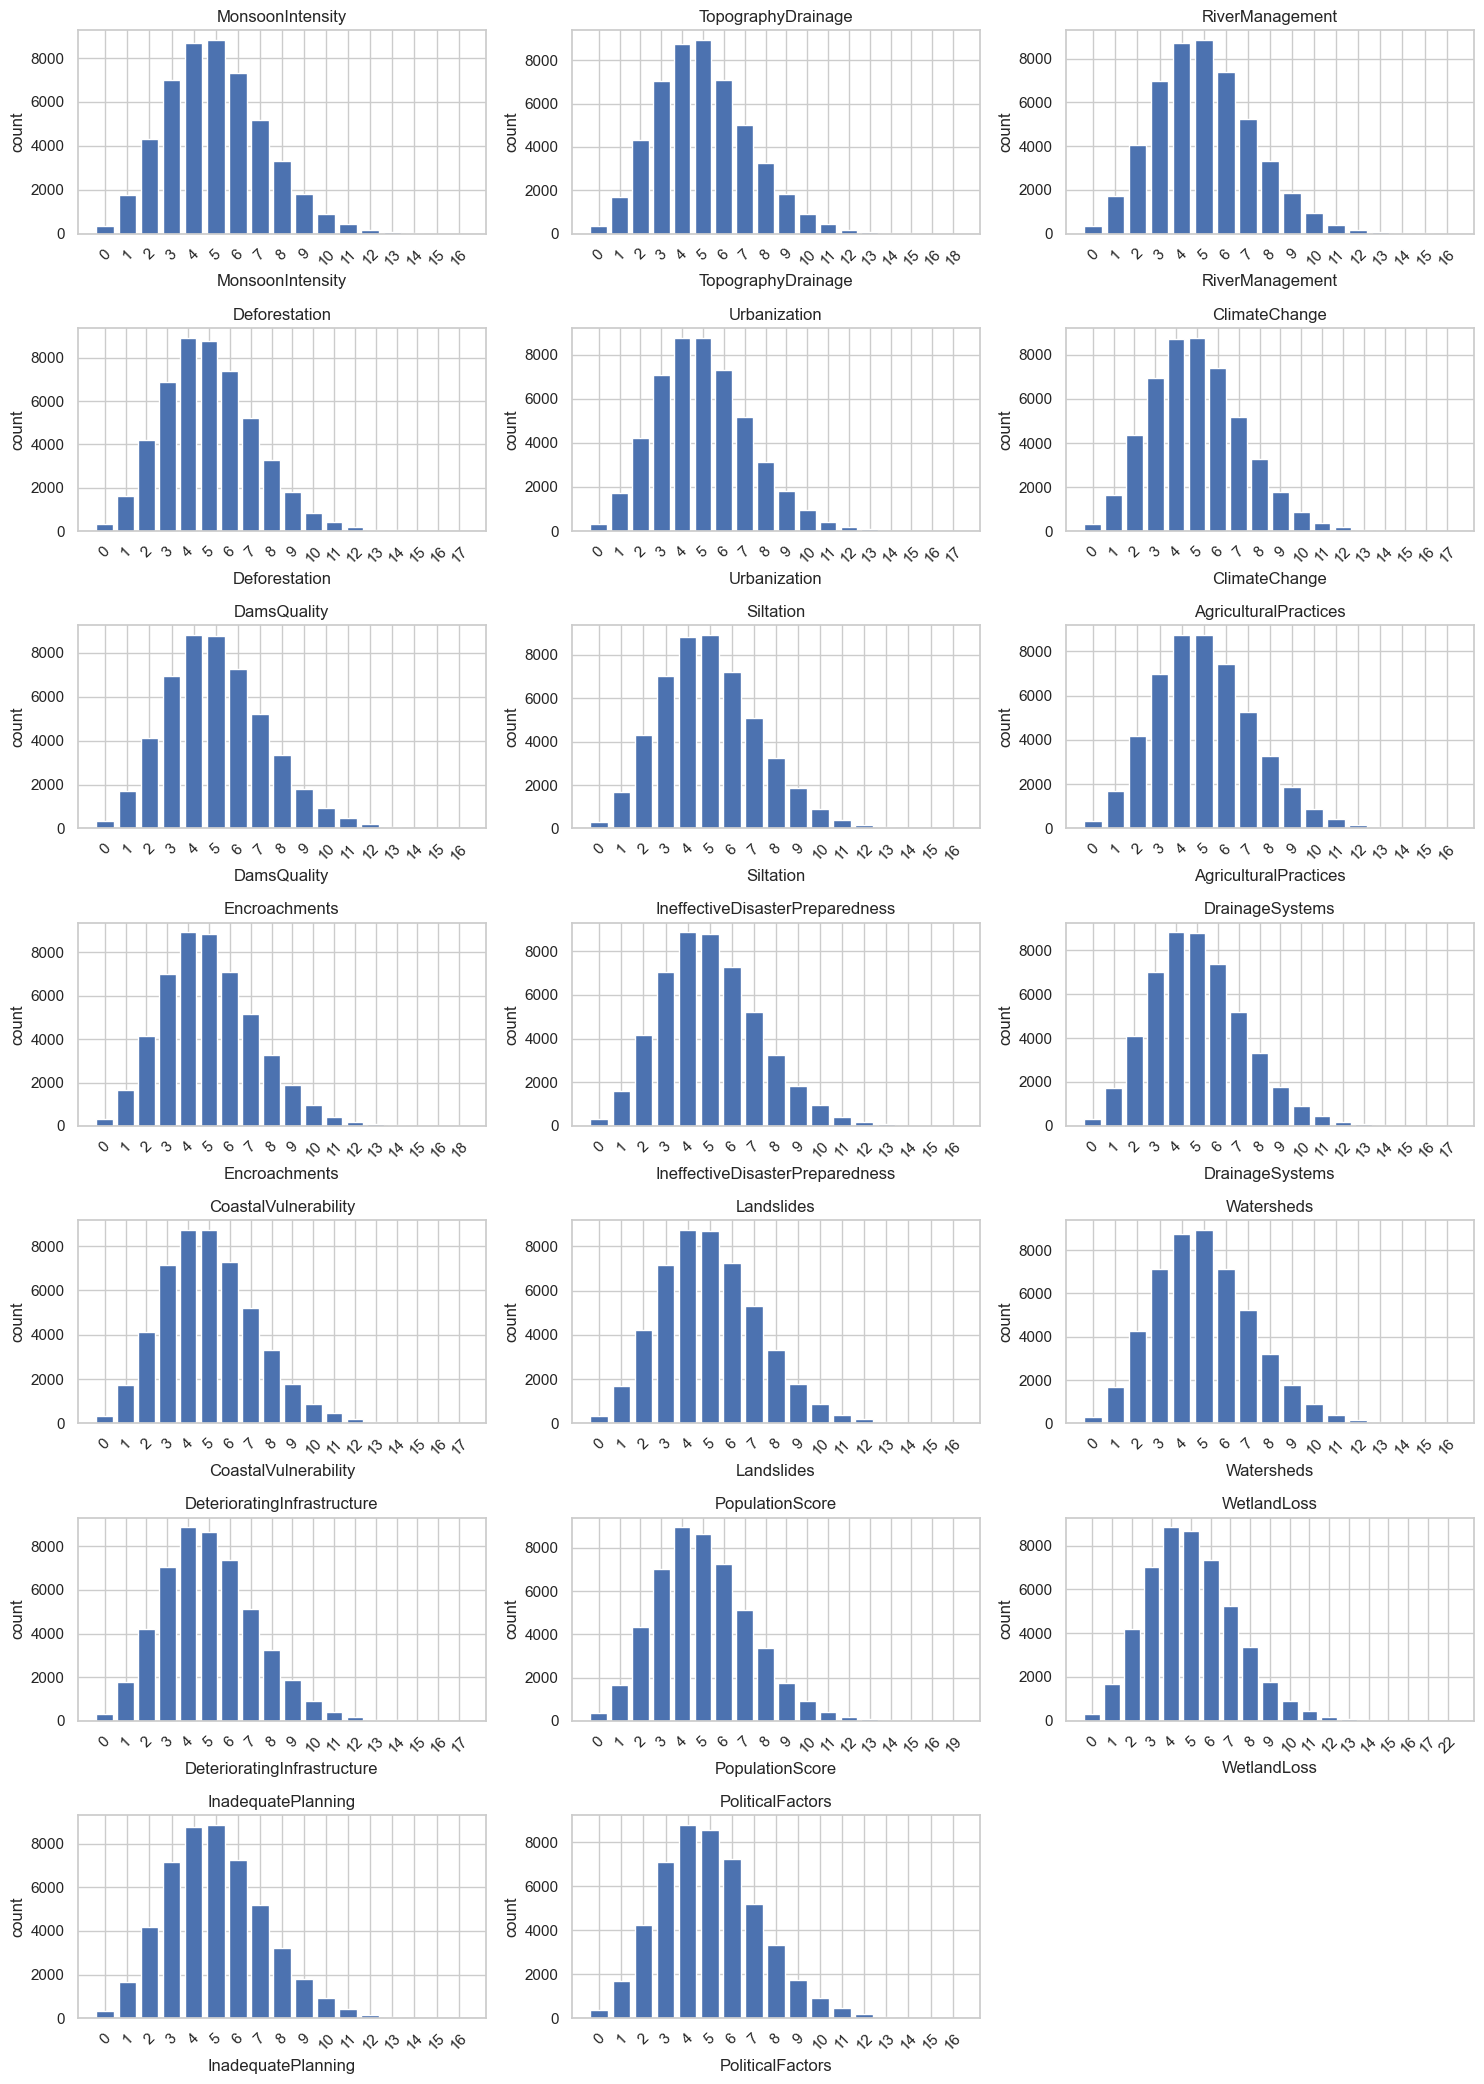

: 

In [ ]:
# Histogrammes pour toutes les variables numériques
num_cols_all = num_cols.copy()
n = len(num_cols_all)
import math
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()
for i, col in enumerate(num_cols_all):
    ax = axes[i]
    values = df[col].dropna()
    nunique = values.nunique()
    # Pour variables discrètes (peu de valeurs uniques) : bar plot sur value_counts
    if (pd.api.types.is_integer_dtype(values) and nunique <= 30) or nunique <= 20:
        vc = values.value_counts().sort_index()
        ax.bar(vc.index.astype(str), vc.values, color='C0')
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        ax.tick_params(axis='x', rotation=45)
    else:
        sns.histplot(values, ax=ax, kde=False, color='C0', bins=30)
        ax.set_xlabel(col)
    ax.set_title(col)
# Supprimer les axes inutilisés
for j in range(i+1, len(axes)):
    try:
        fig.delaxes(axes[j])
    except Exception:
        pass
plt.tight_layout()

### Résumé des distributions des variables explicatives
Nous examinons maintenant les statistiques descriptives, la cardinalité, et le nombre d'outliers (définis par la règle IQR) pour les variables numériques.

In [ ]:
# Résumé numérique + détection simple des outliers par variable (règle IQR)
summary = df[num_cols].describe().T

def count_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

summary['nunique'] = df[num_cols].nunique()
summary['outliers_iqr'] = df[num_cols].apply(count_iqr_outliers)
display(summary.sort_values('outliers_iqr', ascending=False))

count     mean       std    min    25%  \
CoastalVulnerability             50000.0  4.99992  2.247101  0.000  3.000   
DamsQuality                      50000.0  5.01536  2.245000  0.000  3.000   
DrainageSystems                  50000.0  5.00606  2.238107  0.000  3.000   
PoliticalFactors                 50000.0  4.99052  2.246075  0.000  3.000   
TopographyDrainage               50000.0  4.98410  2.246488  0.000  3.000   
Encroachments                    50000.0  5.00638  2.241633  0.000  3.000   
Urbanization                     50000.0  4.98906  2.243159  0.000  3.000   
MonsoonIntensity                 50000.0  4.99148  2.236834  0.000  3.000   
Watersheds                       50000.0  4.97982  2.232190  0.000  3.000   
AgriculturalPractices            50000.0  5.00612  2.234588  0.000  3.000   
Deforestation                    50000.0  5.00848  2.222743  0.000  3.000   
PopulationScore                  50000.0  4.98498  2.238279  0.000  3.000   
WetlandLoss                      50000.0  5.00512  2.231760  0.000  3.000   
Siltation                        50000.0  4.98860  2.232642  0.000  3.000   
InadequatePlanning               50000.0  4.99436  2.230011  0.000  3.000   
DeterioratingInfrastructure      50000.0  4.98820  2.231134  0.000  3.000   
RiverManagement                  50000.0  5.01594  2.231310  0.000  3.000   
IneffectiveDisasterPreparedness  50000.0  5.00502  2.226076  0.000  3.000   
ClimateChange                    50000.0  4.98834  2.226761  0.000  3.000   
Landslides                       50000.0  4.98422  2.227741  0.000  3.000   
FloodProbability                 50000.0  0.49966  0.050034  0.285  0.465   

                                 50%    75%     max  nunique  outliers_iqr  
CoastalVulnerability             5.0  6.000  17.000       18           747  
DamsQuality                      5.0  6.000  16.000       17           741  
DrainageSystems                  5.0  6.000  17.000       18           731  
PoliticalFactors                 5.0  6.000  16.000       17           722  
TopographyDrainage               5.0  6.000  18.000       18           711  
Encroachments                    5.0  6.000  18.000       18           688  
Urbanization                     5.0  6.000  17.000       18           687  
MonsoonIntensity                 5.0  6.000  16.000       17           686  
Watersheds                       5.0  6.000  16.000       17           686  
AgriculturalPractices            5.0  6.000  16.000       17           683  
Deforestation                    5.0  6.000  17.000       18           682  
PopulationScore                  5.0  6.000  19.000       18           677  
WetlandLoss                      5.0  6.000  22.000       19           674  
Siltation                        5.0  6.000  16.000       17           671  
InadequatePlanning               5.0  6.000  16.000       17           670  
DeterioratingInfrastructure      5.0  6.000  17.000       18           663  
RiverManagement                  5.0  6.000  16.000       17           661  
IneffectiveDisasterPreparedness  5.0  6.000  16.000       17           656  
ClimateChange                    5.0  6.000  17.000       18           647  
Landslides                       5.0  6.000  16.000       17           645  
FloodProbability                 0.5  0.535   0.725       83           219

: 

### Diagnostic des distributions et heatmap des fréquences normalisées
Les graphiques précédents montraient des histogrammes similaires car les variables sont des scores entiers sur des plages proches.
Cette cellule calcule un résumé chiffré (min/max/moyenne/std/nunique), affiche les `value_counts` des premières variables et construit une heatmap des fréquences normalisées par valeur
pour mieux visualiser les différences entre colonnes. Enfin, elle affiche la distribution de `FloodProbability` et la corrélation des variables avec la cible.

min     max     mean       std  nunique
MonsoonIntensity                 0.000  16.000  4.99148  2.236834       17
RiverManagement                  0.000  16.000  5.01594  2.231310       17
DamsQuality                      0.000  16.000  5.01536  2.245000       17
Siltation                        0.000  16.000  4.98860  2.232642       17
Landslides                       0.000  16.000  4.98422  2.227741       17
Watersheds                       0.000  16.000  4.97982  2.232190       17
IneffectiveDisasterPreparedness  0.000  16.000  5.00502  2.226076       17
AgriculturalPractices            0.000  16.000  5.00612  2.234588       17
InadequatePlanning               0.000  16.000  4.99436  2.230011       17
PoliticalFactors                 0.000  16.000  4.99052  2.246075       17
Urbanization                     0.000  17.000  4.98906  2.243159       18
ClimateChange                    0.000  17.000  4.98834  2.226761       18
DrainageSystems                  0.000  17.000  5.00606  2.238107       18
Encroachments                    0.000  18.000  5.00638  2.241633       18
TopographyDrainage               0.000  18.000  4.98410  2.246488       18
Deforestation                    0.000  17.000  5.00848  2.222743       18
DeterioratingInfrastructure      0.000  17.000  4.98820  2.231134       18
CoastalVulnerability             0.000  17.000  4.99992  2.247101       18
PopulationScore                  0.000  19.000  4.98498  2.238279       18
WetlandLoss                      0.000  22.000  5.00512  2.231760       19
FloodProbability                 0.285   0.725  0.49966  0.050034       83

--- MonsoonIntensity (nunique=17) ---


MonsoonIntensity
0      332
1     1736
2     4295
3     6978
4     8681
5     8818
6     7322
7     5163
8     3295
9     1809
10     885
11     436
12     148
13      74
14      21
15       4
16       3
Name: count, dtype: int64

--- TopographyDrainage (nunique=18) ---


TopographyDrainage
0      333
1     1711
2     4325
3     7065
4     8776
5     8936
6     7106
7     5013
8     3247
9     1851
10     926
11     439
12     171
13      69
14      22
15       5
16       4
18       1
Name: count, dtype: int64

--- RiverManagement (nunique=17) ---


RiverManagement
0      335
1     1698
2     4065
3     6971
4     8730
5     8845
6     7385
7     5251
8     3296
9     1836
10     927
11     401
12     164
13      61
14      19
15      12
16       4
Name: count, dtype: int64

--- Deforestation (nunique=18) ---


Deforestation
0      328
1     1596
2     4191
3     6904
4     8943
5     8775
6     7398
7     5221
8     3298
9     1812
10     852
11     411
12     166
13      63
14      28
15       9
16       4
17       1
Name: count, dtype: int64

--- Urbanization (nunique=18) ---


Urbanization
0      331
1     1745
2     4213
3     7083
4     8749
5     8791
6     7336
7     5195
8     3113
9     1819
10     938
11     390
12     178
13      78
14      19
15      15
16       4
17       3
Name: count, dtype: int64

--- ClimateChange (nunique=18) ---


ClimateChange
0      326
1     1654
2     4368
3     6961
4     8733
5     8794
6     7403
7     5183
8     3257
9     1796
10     878
11     375
12     172
13      62
14      26
15       9
16       2
17       1
Name: count, dtype: int64

/tmp/ipykernel_893219/1061991094.py:32: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



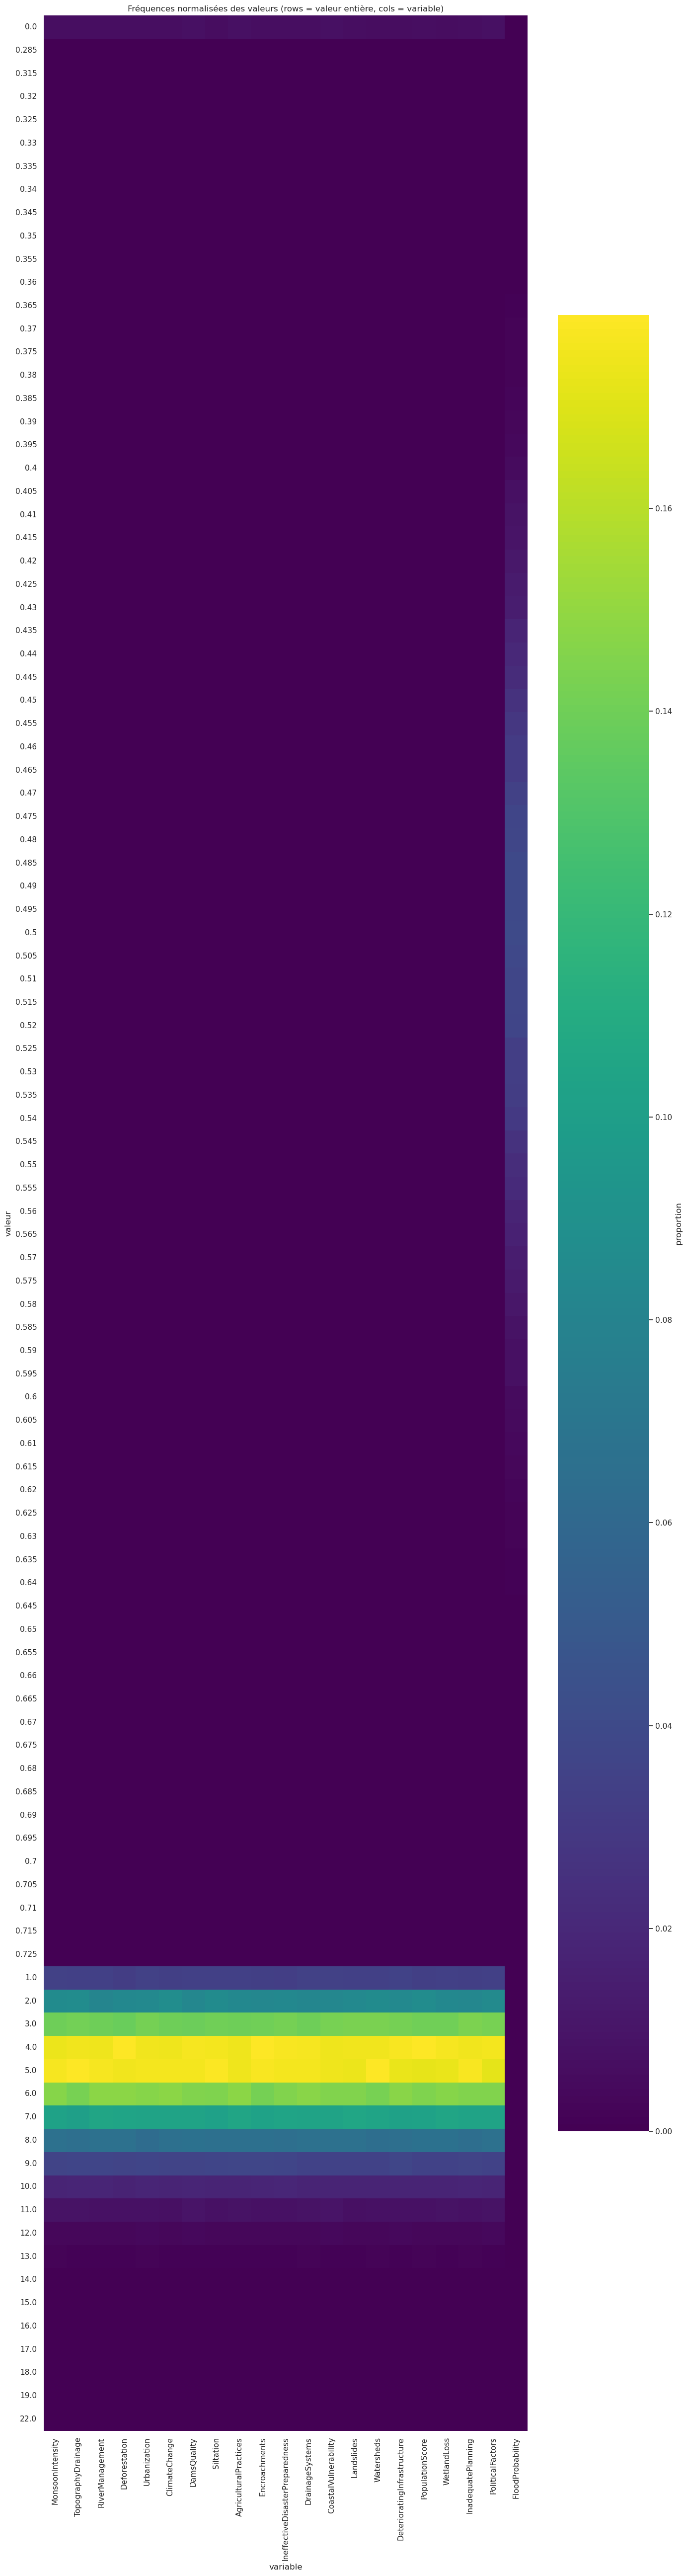

In [16]:
# Diagnostic des distributions et visualisations utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style='whitegrid')

summary = pd.DataFrame({
    'min': df[num_cols].min(),
    'max': df[num_cols].max(),
    'mean': df[num_cols].mean(),
    'std': df[num_cols].std(),
    'nunique': df[num_cols].nunique()
})
display(summary.sort_values('nunique'))

# Afficher value_counts des 6 premières variables pour voir les modes
for col in num_cols[:6]:
    print(f"--- {col} (nunique={df[col].nunique()}) ---")
    display(df[col].value_counts().sort_index().head(30))

# Heatmap des fréquences normalisées par valeur (rows = valeurs, cols = variables)
freqs = {}
all_values = set()
for col in num_cols:
    vc = df[col].value_counts().sort_index()
    freqs[col] = vc
    all_values.update(vc.index.tolist())
all_values = sorted(all_values)

freq_df = pd.DataFrame(index=all_values, columns=num_cols).fillna(0).astype(float)
for col in num_cols:
    vc = freqs[col]
    for v, c in vc.items():
        freq_df.at[v, col] = c
# Normaliser par colonne (proportion)
freq_norm = freq_df.div(freq_df.sum(axis=0).replace(0, 1), axis=1)

plt.figure(figsize=(14, max(4, int(len(all_values)/2))))
sns.heatmap(freq_norm, cmap='viridis', cbar_kws={'label':'proportion'})
plt.ylabel('valeur')
plt.xlabel('variable')
plt.title('Fréquences normalisées des valeurs (rows = valeur entière, cols = variable)')
plt.tight_layout()
plt.show()

pearson_abs  spearman_abs
AgriculturalPractices               0.221846      0.212878
ClimateChange                       0.220986      0.209701
CoastalVulnerability                0.215187      0.207764
DamsQuality                         0.227467      0.216437
Deforestation                       0.220237      0.213954
DeterioratingInfrastructure         0.229444      0.217295
DrainageSystems                     0.217895      0.205360
Encroachments                       0.218259      0.207604
FloodProbability                    1.000000      1.000000
InadequatePlanning                  0.223329      0.213484
IneffectiveDisasterPreparedness     0.225126      0.216766
Landslides                          0.222991      0.211312
MonsoonIntensity                    0.224081      0.212016
PoliticalFactors                    0.225009      0.214410
PopulationScore                     0.226928      0.216566
RiverManagement                     0.228917      0.218282
Siltation                           0.226544      0.216251
TopographyDrainage                  0.229414      0.222213
Urbanization                        0.220867      0.207997
Watersheds                          0.228152      0.220344
WetlandLoss                         0.223732      0.211448

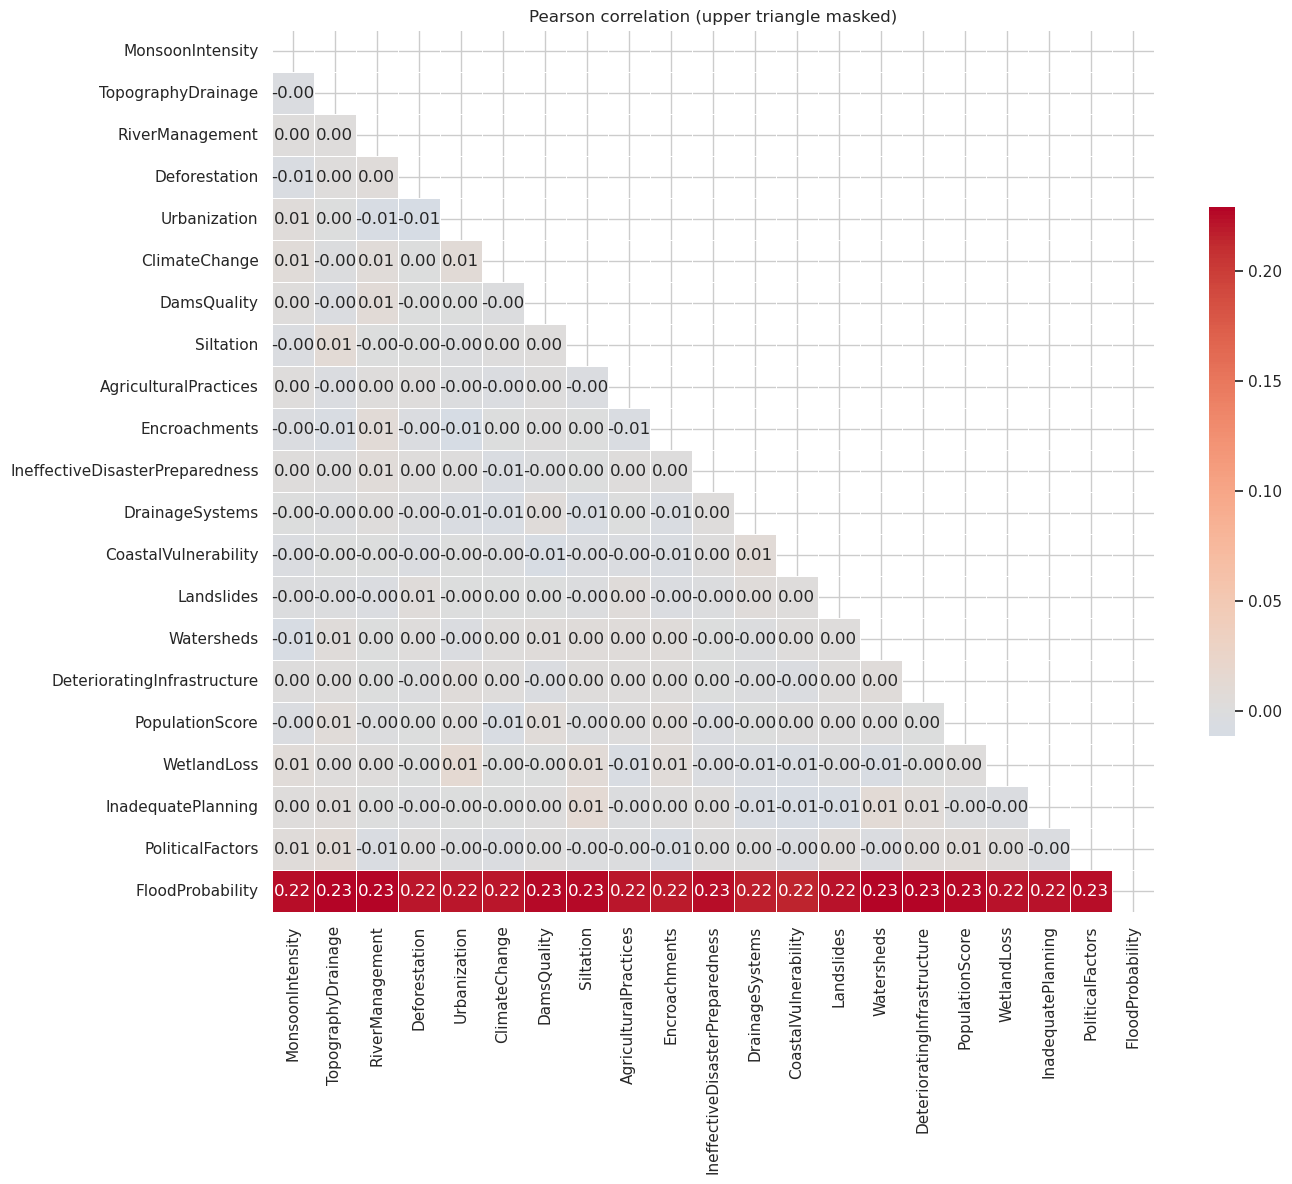

/tmp/ipykernel_893219/2230703444.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




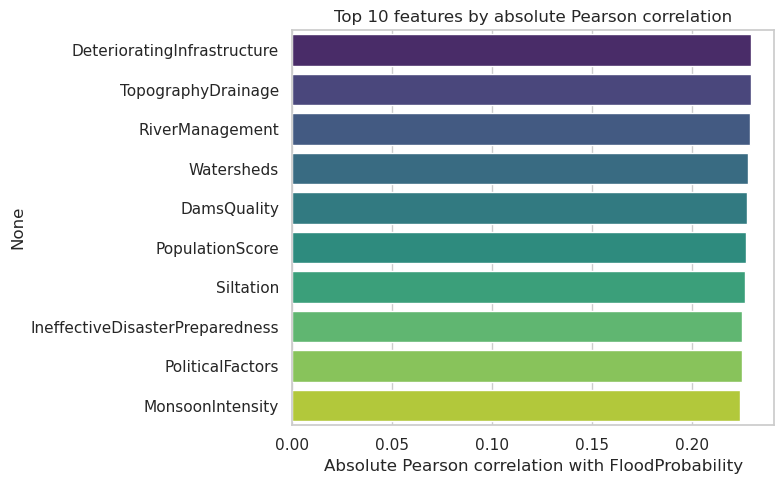

In [11]:
# Matrice de corrélation améliorée : Pearson et Spearman (ignorer colonnes constantes)
import numpy as np
# Sélection des colonnes numériques et conversion en float
num_df = df.select_dtypes(include=[np.number]).astype(float)
# Supprimer colonnes à variance nulle (sinon corr produit NaN)
std = num_df.std()
cols = std[std > 0].index.tolist()
num_df = num_df[cols].copy()

# Calculer Pearson et Spearman
pearson = num_df.corr(method='pearson')
spearman = num_df.corr(method='spearman')

# Corrélations absolues de la cible triées
target_corr_pearson = pearson['FloodProbability'].abs().sort_values(ascending=False)
target_corr_spearman = spearman['FloodProbability'].abs().sort_values(ascending=False)
display(pd.DataFrame({'pearson_abs': target_corr_pearson, 'spearman_abs': target_corr_spearman}))

# Heatmap (masque la moitié supérieure) pour Pearson avec annotations
mask = np.triu(np.ones_like(pearson, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(pearson, mask=mask, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={'shrink': .6})
plt.title('Pearson correlation (upper triangle masked)')
plt.tight_layout()
plt.show()

# Heatmap pour Spearman (ordre monotone) - utile si données ordinales
mask = np.triu(np.ones_like(spearman, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(spearman, mask=mask, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={'shrink': .6})
plt.title('Spearman correlation (upper triangle masked)')
plt.tight_layout()
plt.show()

# Barplot des top 10 features par corrélation absolue (Pearson) avec la cible
top = target_corr_pearson.drop('FloodProbability').head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top.values, y=top.index, palette='viridis')
plt.xlabel('Absolute Pearson correlation with FloodProbability')
plt.title('Top 10 features by absolute Pearson correlation')
plt.tight_layout()
plt.show()

### Relations FloodProbability vs variables explicatives
Nous visualisons ici les relations entre `FloodProbability` et les variables dont la corrélation absolue est la plus forte avec la cible.

Top variables corrélées (Pearson) avec FloodProbability: ['DeterioratingInfrastructure', 'TopographyDrainage', 'RiverManagement', 'Watersheds']


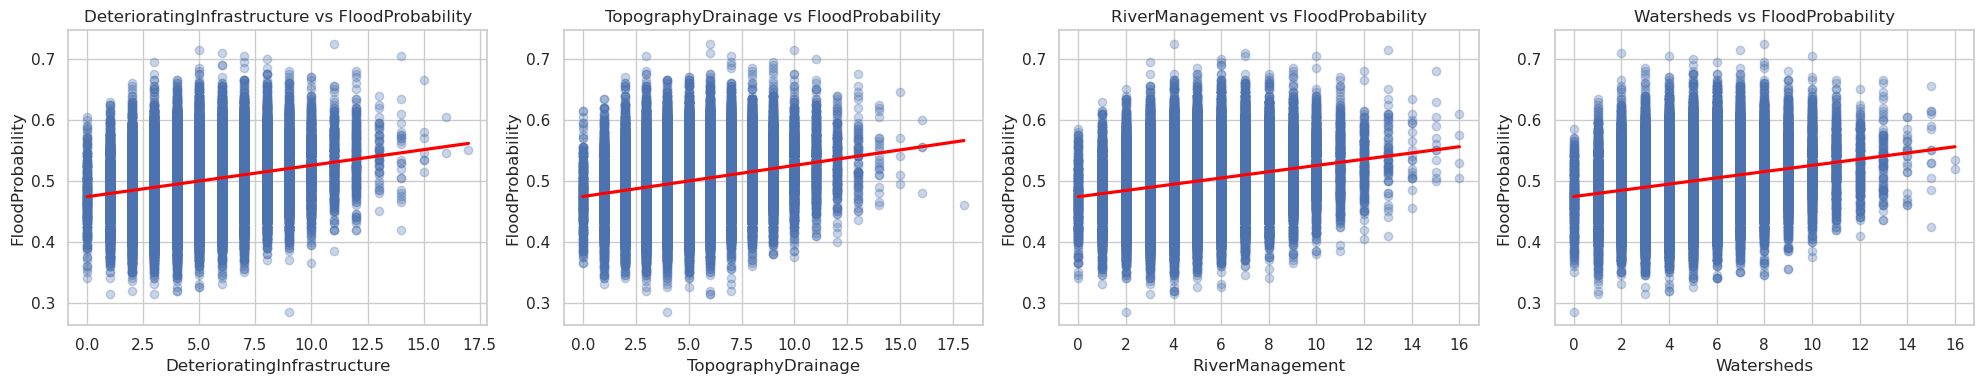

In [ ]:
# Scatter plots avec régression pour les variables les plus corrélées
# Utilise target_corr_pearson calculé précédemment

target = 'FloodProbability'
top_corr = target_corr_pearson.drop(target).head(4).index.tolist()
print('Top variables corrélées (Pearson) avec FloodProbability:', top_corr)

n = len(top_corr)
fig, axes = plt.subplots(1, n, figsize=(5*n, 4))
if n == 1:
    axes = [axes]

for ax, col in zip(axes, top_corr):
    sns.regplot(data=df, x=col, y=target, ax=ax, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    ax.set_title(f'{col} vs {target}')

plt.tight_layout()
plt.show()

### Multicolinéarité entre variables explicatives
Nous recherchons des groupes de variables très corrélées entre elles, ce qui peut poser des problèmes pour des modèles linéaires non régularisés.

In [ ]:
# Corrélation entre features (hors FloodProbability)
features_only = num_df.drop(columns=['FloodProbability'], errors='ignore')
corr_features = features_only.corr(method='pearson')

# Conserver les paires avec corrélation forte
strong_pairs = []
threshold = 0.8
cols = corr_features.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = corr_features.iloc[i, j]
        if abs(val) >= threshold:
            strong_pairs.append((cols[i], cols[j], val))

strong_pairs_df = pd.DataFrame(strong_pairs, columns=['feature_1', 'feature_2', 'corr'])
print('Paires de variables fortement corrélées (|corr| >=', threshold, '):')
display(strong_pairs_df.sort_values('corr', key=lambda s: s.abs(), ascending=False))

Paires de variables fortement corrélées (|corr| >= 0.8 ):


Empty DataFrame
Columns: [feature_1, feature_2, corr]
Index: []

In [ ]:
# Création de bandes de risque pour FloodProbability
risk_bins = [0, 0.4, 0.5, 0.6, 1.0]
risk_labels = ['faible', 'modéré', 'élevé', 'très élevé']
df['FloodRiskBand'] = pd.cut(df['FloodProbability'], bins=risk_bins, labels=risk_labels, include_lowest=True)

print('Répartition des bandes de risque:')
display(df['FloodRiskBand'].value_counts(normalize=True).rename('proportion').to_frame())

# Exemple: distribution d'une variable explicative par bande de risque
example_col = top_corr[0] if len(top_corr) > 0 else num_cols[0]
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='FloodRiskBand', y=example_col)
plt.title(f'{example_col} par bande de probabilité d\'inondation')
plt.tight_layout()
plt.show()

Répartition des bandes de risque:


proportion
FloodRiskBand            
modéré            0.50738
élevé             0.44724
faible            0.02272
très élevé        0.02266

## Conclusion rapide et prochaines étapes
- `FloodProbability` est une variable continue entre ~0.35 et ~0.63 (selon l'échantillon).
- Le heatmap et `target_corr` montrent quelles variables sont les plus liées à la probabilité d'inondation — ce sont de bonnes candidates pour un modèle prédictif ou pour interprétation.
- Prochaines étapes recommandées :
  - Nettoyage plus fin (gestion des outliers, imputation si besoin).
  - Normalisation / standardisation si vous entraînez un modèle.
  - Essayer un modèle simple (ex: régression linéaire ou arbre) pour évaluer l'importance des variables.
  - Visualisations supplémentaires par segments (ex: clustering, classes binaires de la probabilité).

Souhaitez-vous que j'exécute ce notebook pour vérifier qu'il tourne correctement dans votre environnement?

## Modélisation: Decision Tree et Random Forest

Dans cette section nous allons :
- Entraîner un Decision Tree et un Random Forest pour la tâche de régression (prédire `FloodProbability`)
- Tester aussi une version classification (seuils: 0.5 et quantile) pour comparer les performances
- Afficher les métriques et les importances de variables


### Choix des modèles

À partir de l'EDA:
- `FloodProbability` est une variable continue, légèrement asymétrique, dans une plage relativement restreinte.
- Les variables explicatives sont principalement des scores numériques (souvent entiers) avec des corrélations parfois fortes entre elles.
- Les relations avec la cible semblent globalement monotones, pas forcément strictement linéaires.

Nous testons donc:
- Des modèles **linéaires** (régression linéaire, Ridge) comme baseline, avec standardisation et régularisation pour gérer la multicolinéarité.
- Des modèles **à base d'arbres** (Decision Tree, Random Forest) capables de capturer des non-linéarités et d'interactions entre variables.

Nous comparerons les performances (MSE, RMSE, MAE, R²) et examinerons les résidus et l'importance des variables pour comprendre le comportement des modèles.

In [12]:
# Préparation des données pour la modélisation
# Utilise les résultats EDA pour filtrer les features

target = 'FloodProbability'
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target in num_cols:
    num_cols.remove(target)

# Supprimer colonnes constantes
X = df[num_cols].copy()
X = X.loc[:, X.nunique(dropna=True) > 1]
y = df[target]

# Gestion des valeurs manquantes: on enlève les lignes incomplètes (dataset semble propre)
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

print('Shape X, y:', X.shape, y.shape)
print('Features utilisées:', X.columns.tolist())

Shape X, y: (50000, 20) (50000,)
Features utilisées: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']


In [14]:
# Baseline: Linear Regression et Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge(alpha=1.0)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0, random_state=42))
    ])
}

lin_results = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    lin_results[name] = {
        'MSE': mean_squared_error(y_test, pred),
        'MAE': mean_absolute_error(y_test, pred),
        'R2': r2_score(y_test, pred)
    }

lin_res_df = pd.DataFrame(lin_results).T
print('Résultats modèles linéaires (baseline):')
display(lin_res_df)

Résultats modèles linéaires (baseline):


MSE           MAE   R2
LinearRegression  7.965030e-33  6.633583e-17  1.0
Ridge(alpha=1.0)  1.548388e-12  9.932244e-07  1.0

Résultats modèles arbres:


MSE       MAE        R2
DecisionTreeRegressor  0.002211  0.037311  0.112346
RandomForestRegressor  0.000666  0.020356  0.732500

/tmp/ipykernel_761877/2036226683.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




/home/alono/micromamba/envs/satellite/lib/python3.11/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning:

The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.

/home/alono/micromamba/envs/satellite/lib/python3.11/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning:

The column 6 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.

/home/alono/micromamba/envs/satellite/lib/python3.11/site-packages/sklearn

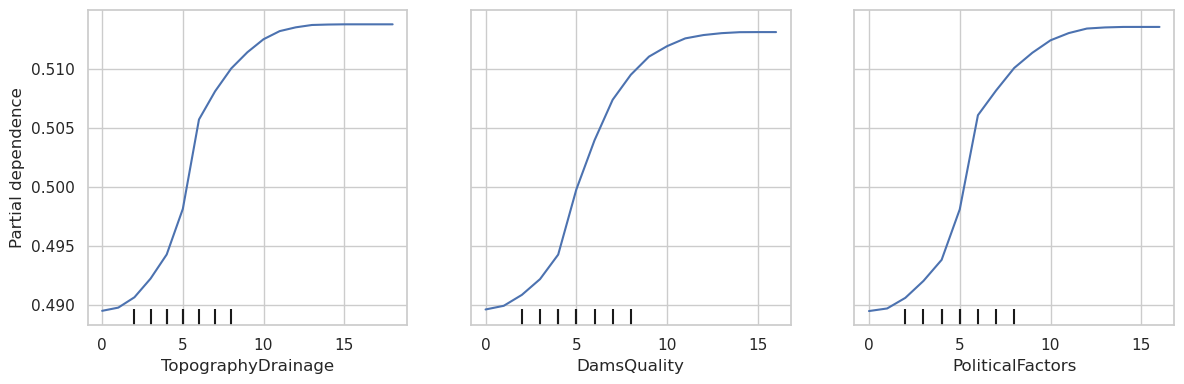

In [16]:
# Regressors: Decision Tree and Random Forest (sur la même partition)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth=None)
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

models_tree = {'DecisionTreeRegressor': dt, 'RandomForestRegressor': rf}
tree_results = {}

for name, m in models_tree.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    tree_results[name] = {
        'MSE': mean_squared_error(y_test, pred),
        'MAE': mean_absolute_error(y_test, pred),
        'R2': r2_score(y_test, pred)
    }

tree_res_df = pd.DataFrame(tree_results).T
print('Résultats modèles arbres:')
display(tree_res_df)

# Feature importances pour RandomForest
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=importances.values[:20], y=importances.index[:20], palette='viridis')
plt.title('Random Forest top-20 feature importances')
plt.tight_layout()
plt.show()

# Analyse des résidus pour RandomForest
rf_pred = rf.predict(X_test)
residuals = y_test - rf_pred

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(x=y_test, y=rf_pred, ax=ax[0], alpha=0.5)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[0].set_xlabel('Valeurs réelles')
ax[0].set_ylabel('Prédictions RF')
ax[0].set_title('RandomForest: prédictions vs réel')

sns.histplot(residuals, kde=True, ax=ax[1])
ax[1].set_title('Distribution des résidus (RF)')
plt.tight_layout()
plt.show()

# Partial dependence pour les variables les plus importantes
from sklearn.inspection import PartialDependenceDisplay

top_features_pd = importances.index[:3].tolist()
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(rf, X, top_features_pd, ax=ax)
plt.tight_layout()
plt.show()

Using features: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']
Regression results:
Regression results:


MSE       MAE        R2
DecisionTreeRegressor  0.002211  0.037311  0.112346
RandomForestRegressor  0.000666  0.020356  0.732500

/tmp/ipykernel_761877/3119445557.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




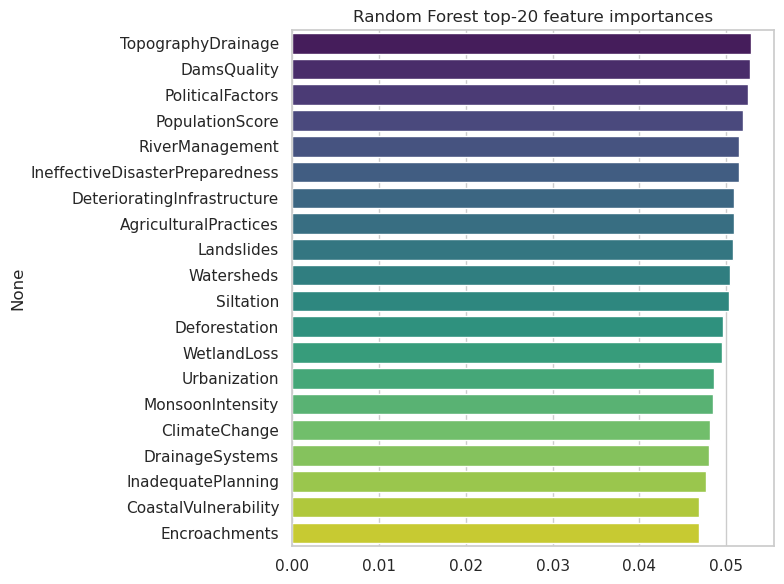

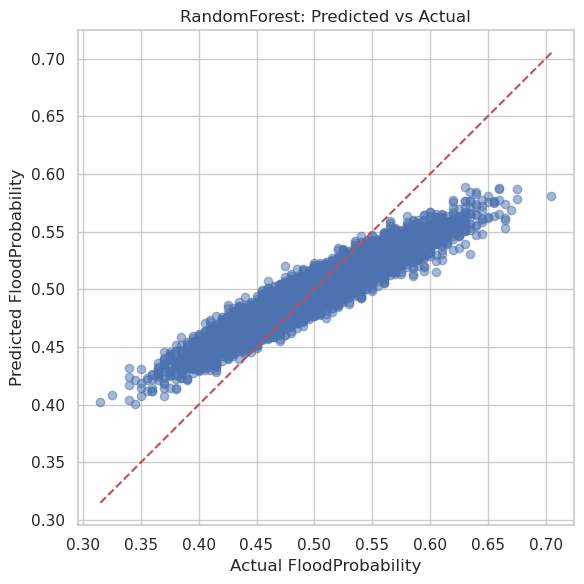

In [17]:
# Regressors: Decision Tree and Random Forest (predict FloodProbability)
try:
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
except Exception as e:
    print('Please install scikit-learn: pip install scikit-learn')
    raise

# Features selection
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'FloodProbability' in num_cols:
    num_cols.remove('FloodProbability')
# Filter out constant columns
X = df[num_cols].copy()
X = X.loc[:, X.nunique(dropna=True) > 1]
# Target
y = df['FloodProbability']

# Drop rows with missing values in X or y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

print('Using features:', X.columns.tolist())

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Evaluate
models = {'DecisionTreeRegressor': dt, 'RandomForestRegressor': rf}

results = {}
for name, m in models.items():
    pred = m.predict(X_test)
    results[name] = {
        'MSE': mean_squared_error(y_test, pred),
        'MAE': mean_absolute_error(y_test, pred),
        'R2': r2_score(y_test, pred)
    }

import pandas as pd
res_df = pd.DataFrame(results).T
print('Regression results:')
display(res_df)

# Feature importances for the RandomForest
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=importances.values[:20], y=importances.index[:20], palette='viridis')
plt.title('Random Forest top-20 feature importances')
plt.tight_layout()
plt.show()

# Pred vs actual plot for RandomForest
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual FloodProbability')
plt.ylabel('Predicted FloodProbability')
plt.title('RandomForest: Predicted vs Actual')
plt.tight_layout()
plt.show()


In [18]:
# Classification: Binary labels from FloodProbability
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Create two binary labels: threshold 0.5 and top quartile
if 'FloodProbability' not in df.columns:
    raise ValueError('FloodProbability not found')

threshold = 0.5
y_bin = (df['FloodProbability'] > threshold).astype(int)

q = 0.75
quantile_th = df['FloodProbability'].quantile(q)
print(f"Quantile {q} threshold: {quantile_th:.3f}")
y_bin_q = (df['FloodProbability'] > quantile_th).astype(int)

# Use numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'FloodProbability' in num_cols:
    num_cols.remove('FloodProbability')
X = df[num_cols].copy()
X = X.loc[:, X.nunique(dropna=True) > 1]

# Drop NA rows
mask = X.notnull().all(axis=1) & df['FloodProbability'].notnull()
X = X[mask]

y_bin = y_bin.loc[mask]

y_bin_q = y_bin_q.loc[mask]

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Fit classifiers
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

clf_rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf_rf.fit(X_train, y_train)

# Evaluate on the 0.5 threshold
for name, model in [('DecisionTreeClassifier', clf_dt), ('RandomForestClassifier', clf_rf)]:
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]
    print('\n==', name)
    print('Accuracy:', accuracy_score(y_test, pred))
    print('Precision:', precision_score(y_test, pred, zero_division=0))
    print('Recall:', recall_score(y_test, pred, zero_division=0))
    print('F1:', f1_score(y_test, pred, zero_division=0))
    if len(np.unique(y_test)) > 1:
        print('ROC-AUC:', roc_auc_score(y_test, proba))

# Confusion matrix for RandomForest
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest confusion matrix (threshold=0.5)')
plt.show()

# Optionally evaluate classification for quantile threshold
X_train, X_test, y_train_q, y_test_q = train_test_split(X, y_bin_q, test_size=0.2, random_state=42)
clf_rf_q = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf_rf_q.fit(X_train, y_train_q)
pred_q = clf_rf_q.predict(X_test)
print('\nRandomForest (quantile threshold):')
print('Accuracy:', accuracy_score(y_test_q, pred_q))
print('F1:', f1_score(y_test_q, pred_q, zero_division=0))


Quantile 0.75 threshold: 0.535

== DecisionTreeClassifier
Accuracy: 0.6914
Precision: 0.6766339171294319
Recall: 0.6683544303797468
F1: 0.6724686902992996
ROC-AUC: 0.6902608653799875

== DecisionTreeClassifier
Accuracy: 0.6914
Precision: 0.6766339171294319
Recall: 0.6683544303797468
F1: 0.6724686902992996
ROC-AUC: 0.6902608653799875

== RandomForestClassifier
Accuracy: 0.9027
Precision: 0.9340861949758009
Recall: 0.8550632911392405
F1: 0.8928296067848882
ROC-AUC: 0.9738147952062377

== RandomForestClassifier
Accuracy: 0.9027
Precision: 0.9340861949758009
Recall: 0.8550632911392405
F1: 0.8928296067848882
ROC-AUC: 0.9738147952062377



RandomForest (quantile threshold):
Accuracy: 0.841
F1: 0.46500672947510097


In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier,
    GradientBoostingRegressor, GradientBoostingClassifier,
    BaggingRegressor, BaggingClassifier
)
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, LogisticRegression
)
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# =========================
# REGRESSION MODELS
# =========================

regressors = {
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
    "GradientBoostingRegressor": GradientBoostingRegressor(
        random_state=42
    ),
    "BaggingRegressor": BaggingRegressor(
        random_state=42, n_jobs=-1
    ),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=1e-3, random_state=42),
    "SVR": SVR(),  # RBF kernel by default
    "KNeighborsRegressor": KNeighborsRegressor()
}

print("\n=== REGRESSION: 5-fold CV (RMSE) ===")
for name, model in regressors.items():
    neg_mse = cross_val_score(
        model, X, y,
        scoring='neg_mean_squared_error',
        cv=5, n_jobs=-1
    )
    rmse_scores = np.sqrt(-neg_mse)
    print(f"\n== {name} ==")
    print("RMSE (5-fold):", rmse_scores)
    print("RMSE mean: {:.4f}, std: {:.4f}".format(
        rmse_scores.mean(), rmse_scores.std()
    ))

# Small grids for a few regressors
param_grids_reg = {
    "RandomForestRegressor": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10],
    },
    "GradientBoostingRegressor": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
    },
    "Ridge": {
        "alpha": [0.1, 1.0, 10.0],
    },
    "Lasso": {
        "alpha": [1e-4, 1e-3, 1e-2],
    }
}

print("\n=== REGRESSION: Small GridSearchCV (RMSE) ===")
for name, model in regressors.items():
    if name not in param_grids_reg:
        continue
    print(f"\n-- GridSearch for {name} --")
    gs = GridSearchCV(
        model,
        param_grids_reg[name],
        scoring='neg_mean_squared_error',
        cv=3, n_jobs=-1, verbose=1
    )
    gs.fit(X, y)
    print("Best params:", gs.best_params_)
    print("Best RMSE (cv): {:.4f}".format(np.sqrt(-gs.best_score_)))

# =========================
# CLASSIFICATION MODELS
# =========================

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
    "GradientBoostingClassifier": GradientBoostingClassifier(
        random_state=42
    ),
    "BaggingClassifier": BaggingClassifier(
        random_state=42, n_jobs=-1
    ),
    "LogisticRegression": LogisticRegression(
        max_iter=1000, n_jobs=-1
    ),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier()
}

print("\n=== CLASSIFICATION: 5-fold CV (ROC-AUC) ===")
for name, model in classifiers.items():
    auc_scores = cross_val_score(
        model, X, y_bin,
        scoring='roc_auc',
        cv=5, n_jobs=-1
    )
    print(f"\n== {name} ==")
    print("ROC-AUC (5-fold):", auc_scores)
    print("ROC-AUC mean: {:.4f}, std: {:.4f}".format(
        auc_scores.mean(), auc_scores.std()
    ))

# Small grids for a few classifiers
param_grids_clf = {
    "RandomForestClassifier": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10],
    },
    "GradientBoostingClassifier": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
    },
    "LogisticRegression": {
        "C": [0.1, 1.0, 10.0],
        "penalty": ["l2"],
    }
}

print("\n=== CLASSIFICATION: Small GridSearchCV (ROC-AUC) ===")
for name, model in classifiers.items():
    if name not in param_grids_clf:
        continue
    print(f"\n-- GridSearch for {name} --")
    gs_clf = GridSearchCV(
        model,
        param_grids_clf[name],
        scoring='recall',
        cv=3, n_jobs=-1, verbose=1
    )
    gs_clf.fit(X, y_bin)
    print("Best params:", gs_clf.best_params_)
    print("Best ROC-AUC (cv): {:.4f}".format(gs_clf.best_score_))


347.31s - Error patching args (debugger not attached to subprocess).
Traceback (most recent call last):
  File "/home/alono/.local/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/alono/.local/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 193, in _get_python_c_args
    if "__future__" in code:
       ^^^^^^^^^^^^^^^^^^^^
TypeError: a bytes-like object is required, not 'str'
Traceback (most recent call last):
  File "/home/alono/.local/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


=== REGRESSION: 5-fold CV (RMSE) ===


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0


== RandomForestRegressor ==
RMSE (5-fold): [0.02619844 0.02542612 0.02568994 0.02604386 0.02595539]
RMSE mean: 0.0259, std: 0.0003

== GradientBoostingRegressor ==
RMSE (5-fold): [0.02367516 0.02299635 0.02323859 0.02347823 0.02322484]
RMSE mean: 0.0233, std: 0.0002

== GradientBoostingRegressor ==
RMSE (5-fold): [0.02367516 0.02299635 0.02323859 0.02347823 0.02322484]
RMSE mean: 0.0233, std: 0.0002

== BaggingRegressor ==
RMSE (5-fold): [0.02870114 0.02816808 0.02833543 0.02862885 0.02847659]
RMSE mean: 0.0285, std: 0.0002

== BaggingRegressor ==
RMSE (5-fold): [0.02870114 0.02816808 0.02833543 0.02862885 0.02847659]
RMSE mean: 0.0285, std: 0.0002

== LinearRegression ==
RMSE (5-fold): [9.05546657e-17 1.04134836e-16 1.92038098e-16 8.13801807e-17
 1.39585988e-16]
RMSE mean: 0.0000, std: 0.0000

== Ridge ==
RMSE (5-fold): [2.54035684e-07 2.45681481e-07 2.48242208e-07 2.51994692e-07
 2.50164008e-07]
RMSE mean: 0.0000, std: 0.0000

== LinearRegression ==
RMSE (5-fold): [9.05546657e-17 1.

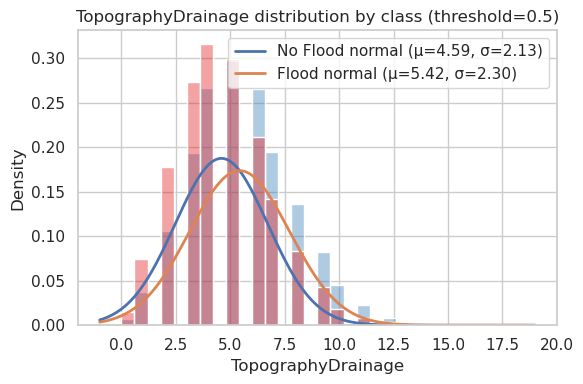

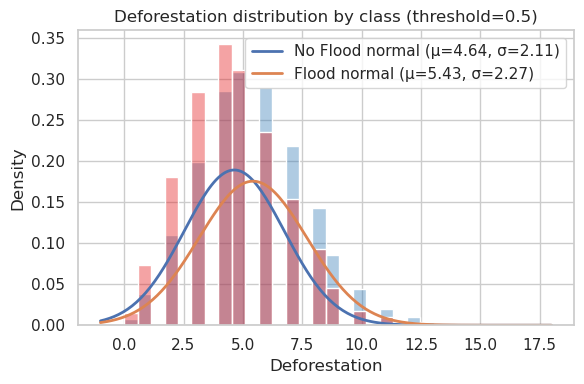

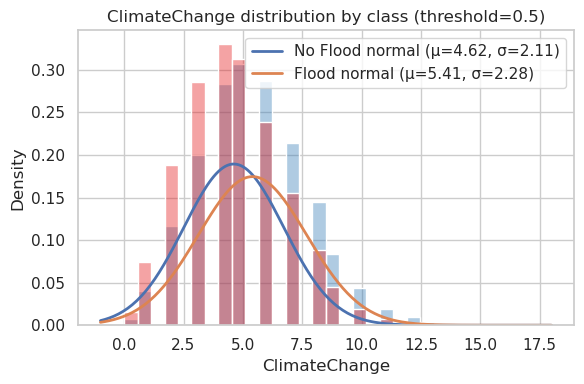

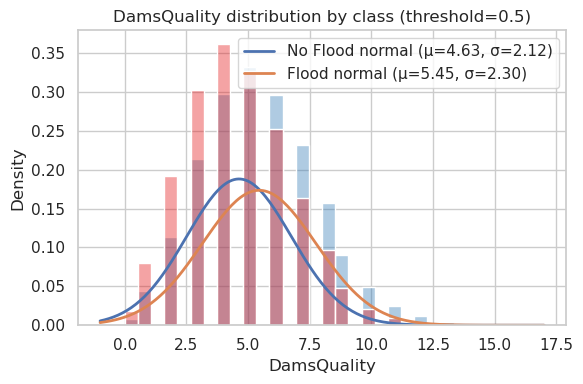

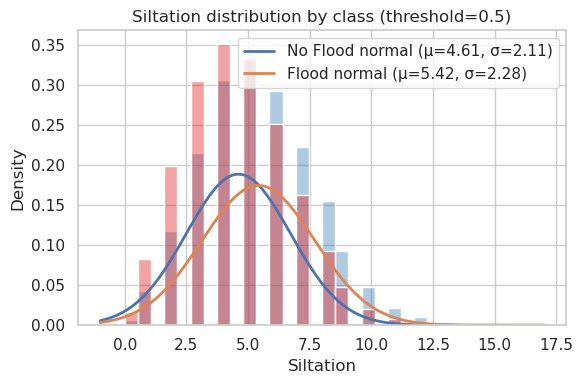

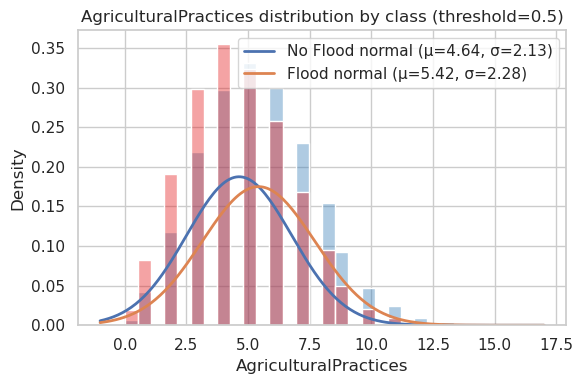

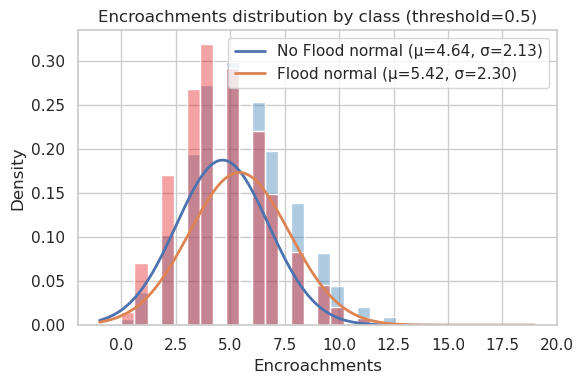

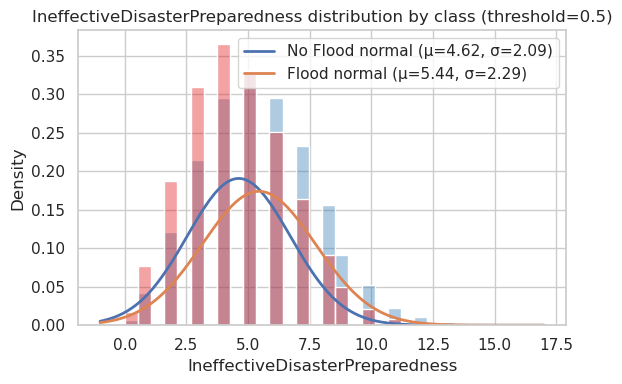

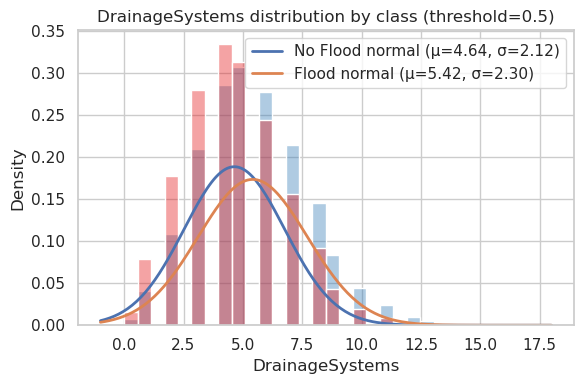

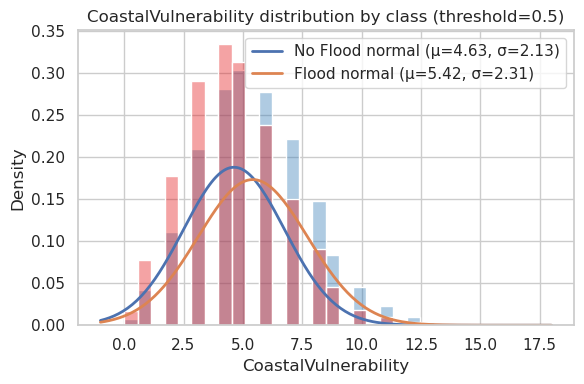

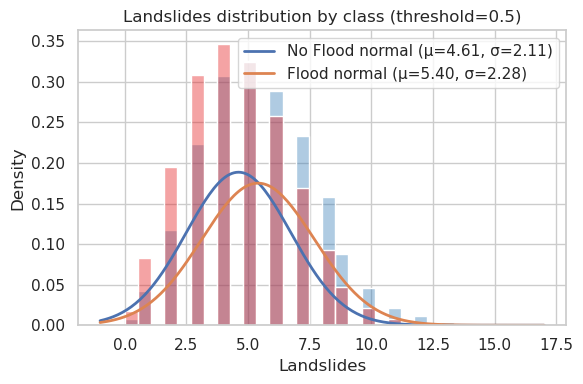

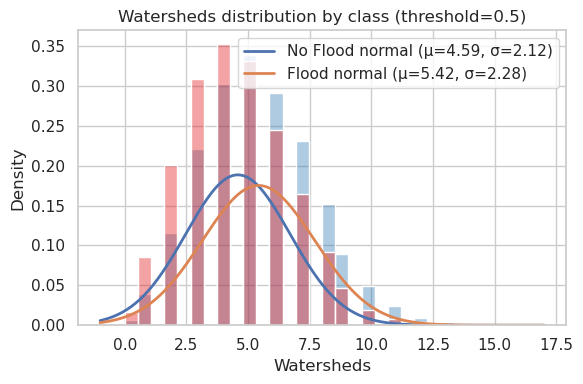

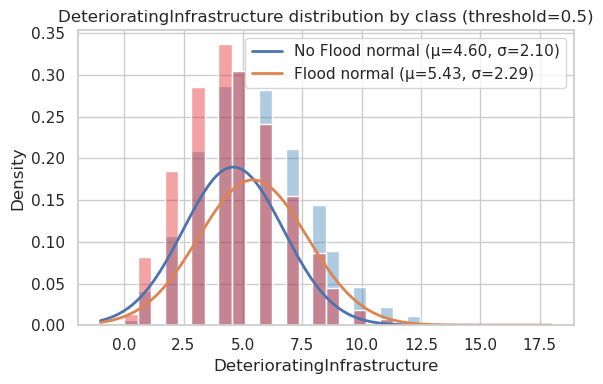

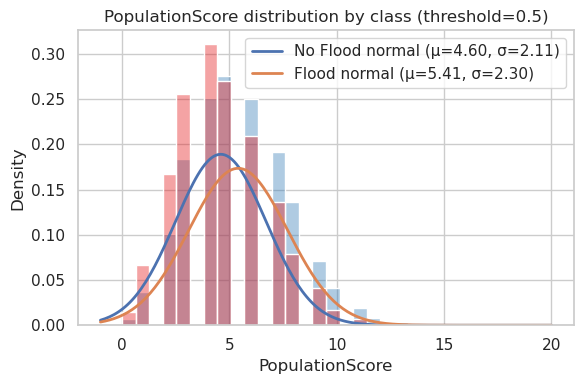

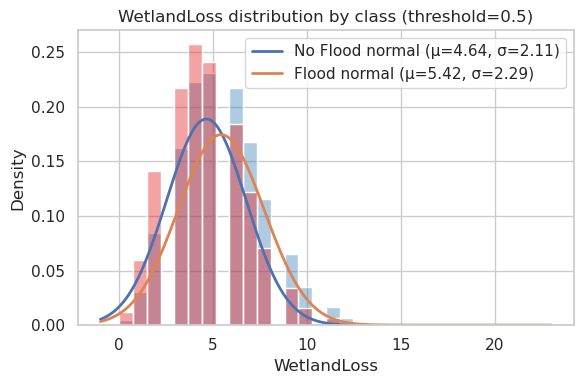

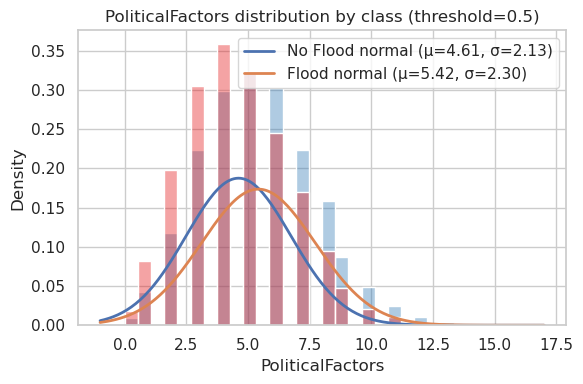

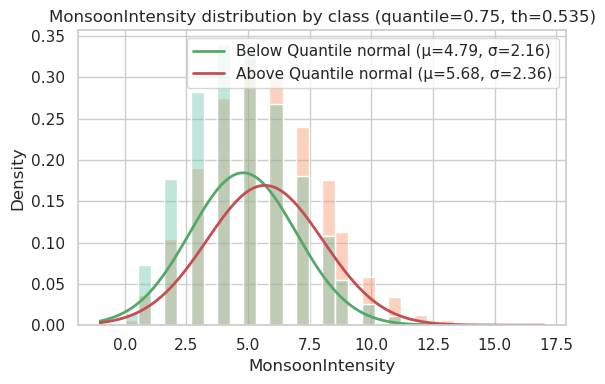

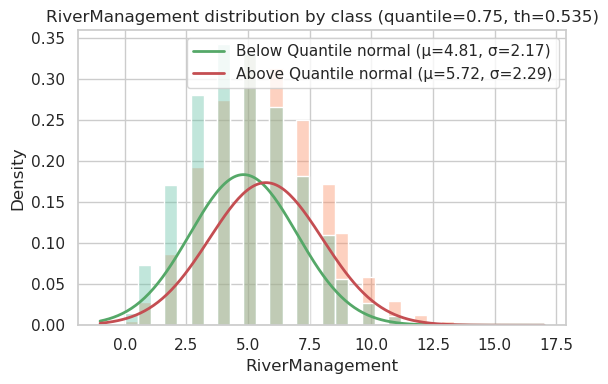

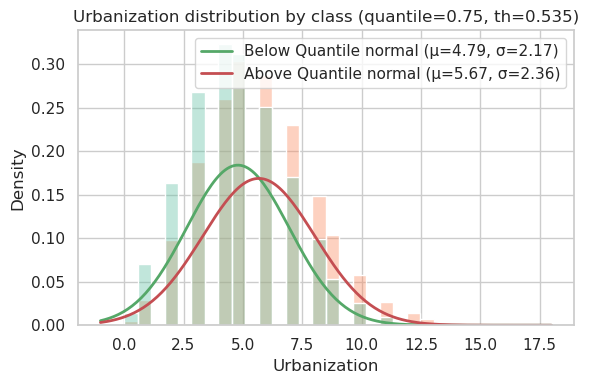

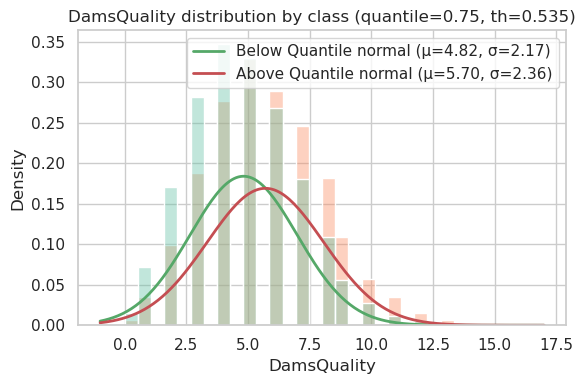

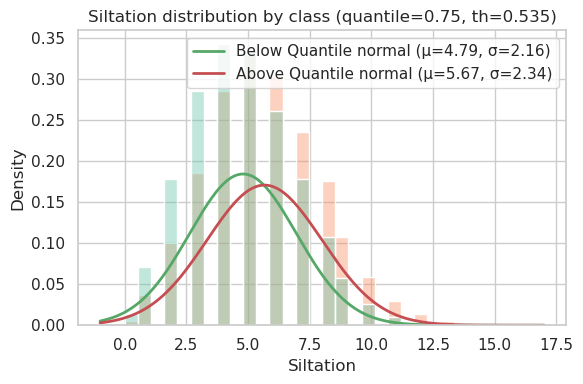

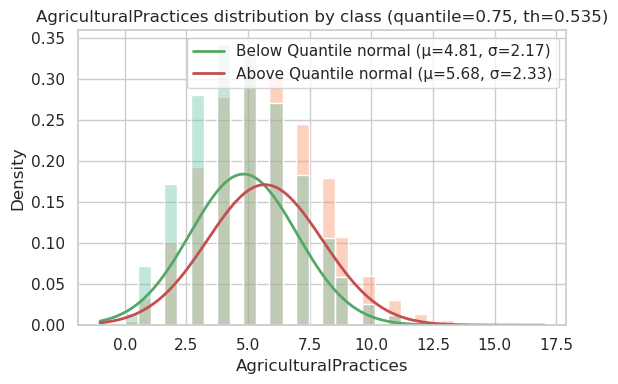

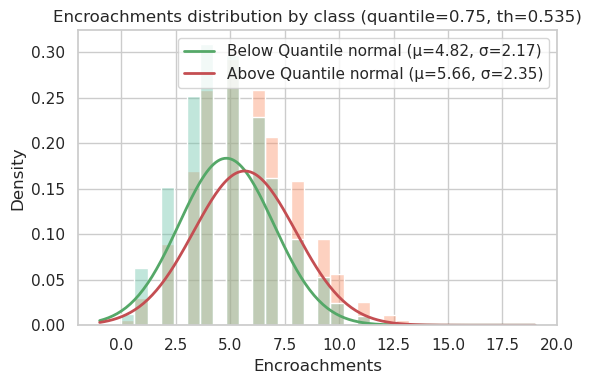

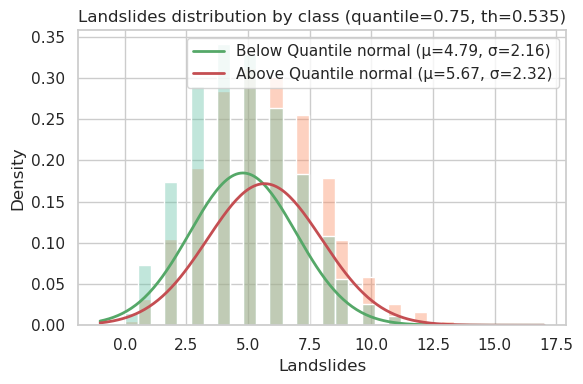

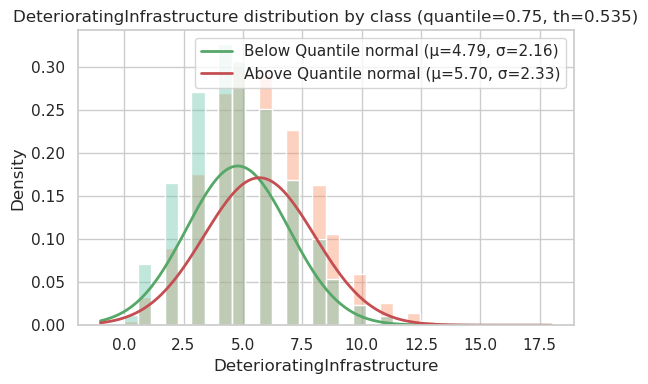

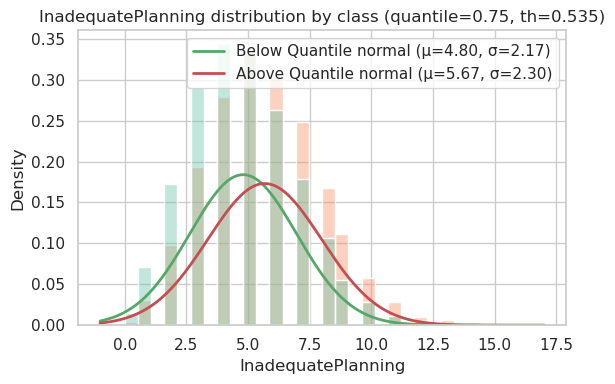

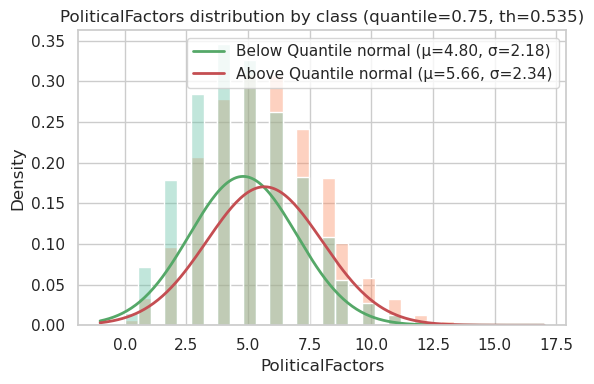

In [21]:
# Plot each feature grouped by class with a fitted normal (Gaussian) curve instead of KDE
for col in num_cols:
    plt.figure(figsize=(6, 4))
    # density histogram per class
    sns.histplot(data=df, x=col, hue=y_bin, bins=30, stat='density',
                 palette='Set1', alpha=0.4, element='bars', common_norm=False)
    x_min, x_max = df[col].min(), df[col].max()
    x = np.linspace(x_min - 1, x_max + 1, 200)
    labels = ['No Flood', 'Flood']
    colors = ['C0', 'C1']
    for cls, color in zip([0, 1], colors):
        vals = df.loc[y_bin == cls, col].dropna()
        if len(vals) < 2:
            continue
        mu = vals.mean()
        sigma = vals.std()
        if sigma == 0 or np.isnan(sigma):
            continue
        pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
        plt.plot(x, pdf, color=color, lw=2, label=f'{labels[cls]} normal (μ={mu:.2f}, σ={sigma:.2f})')
    plt.title(f'{col} distribution by class (threshold={threshold})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Optionally, for quantile threshold (overlay fitted normal per quantile class)
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue=y_bin_q, bins=30, stat='density',
                 palette='Set2', alpha=0.4, element='bars', common_norm=False)
    x_min, x_max = df[col].min(), df[col].max()
    x = np.linspace(x_min - 1, x_max + 1, 200)
    labels_q = ['Below Quantile', 'Above Quantile']
    colors_q = ['C2', 'C3']
    for cls, color in zip([0, 1], colors_q):
        vals = df.loc[y_bin_q == cls, col].dropna()
        if len(vals) < 2:
            continue
        mu = vals.mean()
        sigma = vals.std()
        if sigma == 0 or np.isnan(sigma):
            continue
        pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
        plt.plot(x, pdf, color=color, lw=2, label=f'{labels_q[cls]} normal (μ={mu:.2f}, σ={sigma:.2f})')
    plt.title(f'{col} distribution by class (quantile={q:.2f}, th={quantile_th:.3f})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


Poids LinearRegression:


CoastalVulnerability               0.011235
TopographyDrainage                 0.011232
PoliticalFactors                   0.011230
DamsQuality                        0.011225
Urbanization                       0.011216
Encroachments                      0.011208
PopulationScore                    0.011191
DrainageSystems                    0.011190
MonsoonIntensity                   0.011184
AgriculturalPractices              0.011173
Siltation                          0.011163
Watersheds                         0.011161
WetlandLoss                        0.011159
RiverManagement                    0.011156
DeterioratingInfrastructure        0.011156
InadequatePlanning                 0.011150
Landslides                         0.011139
ClimateChange                      0.011134
IneffectiveDisasterPreparedness    0.011130
Deforestation                      0.011114
dtype: float64

Poids LogisticRegression:


CoastalVulnerability               7.701847
DamsQuality                        7.677734
Encroachments                      7.661737
TopographyDrainage                 7.659653
PoliticalFactors                   7.658558
PopulationScore                    7.654386
Urbanization                       7.632129
DrainageSystems                    7.630795
DeterioratingInfrastructure        7.618320
Watersheds                         7.613678
MonsoonIntensity                   7.613192
AgriculturalPractices              7.610664
Landslides                         7.602217
ClimateChange                      7.598522
WetlandLoss                        7.596985
Siltation                          7.596502
InadequatePlanning                 7.595901
IneffectiveDisasterPreparedness    7.570448
RiverManagement                    7.569554
Deforestation                      7.561556
dtype: float64

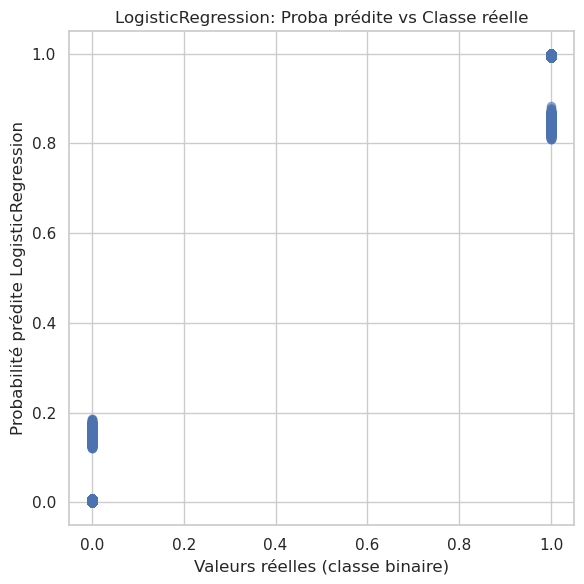

In [22]:
# Affichage des poids des modèles linéaires et logistiques + plot prédictions vs valeurs réelles
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pour la régression linéaire
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linreg = LinearRegression()
linreg.fit(X_scaled, y)
weights_lin = pd.Series(linreg.coef_, index=X.columns)
print('Poids LinearRegression:')
display(weights_lin.sort_values(key=abs, ascending=False))

# Prédictions vs valeurs réelles (régression linéaire)
y_pred_lin = linreg.predict(X_scaled)
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred_lin, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions LinearRegression')
plt.title('LinearRegression: Prédictions vs Réel')
plt.tight_layout()
plt.show()

# Pour la régression logistique (classification binaire, seuil 0.5)
logreg = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg.fit(X_scaled, y_bin)
weights_log = pd.Series(logreg.coef_[0], index=X.columns)
print('Poids LogisticRegression:')
display(weights_log.sort_values(key=abs, ascending=False))

# Prédictions vs valeurs réelles (logistique, proba)
y_pred_log_proba = logreg.predict_proba(X_scaled)[:, 1]
plt.figure(figsize=(6, 6))
plt.scatter(y_bin, y_pred_log_proba, alpha=0.5)
plt.xlabel('Valeurs réelles (classe binaire)')
plt.ylabel('Probabilité prédite LogisticRegression')
plt.title('LogisticRegression: Proba prédite vs Classe réelle')
plt.tight_layout()
plt.show()

### Diagnostics supplémentaires pour les modèles linéaires et logistiques
Ces graphiques comparent les coefficients aux corrélations, examinent les résidus du modèle linéaire, et vérifient la calibration ainsi que la courbe ROC du modèle logistique.

In [26]:
# Corrélations vs coefficients (linéaire et logistique)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coef_df = pd.DataFrame({
    'corr_with_target': X.corrwith(y),
    'corr_with_binary': X.corrwith(y_bin),
    'lin_coef': weights_lin,
    'log_coef': weights_log
}).dropna()

sign_counts = pd.DataFrame({
    'positive': (coef_df[['lin_coef', 'log_coef']] > 0).sum(),
    'negative': (coef_df[['lin_coef', 'log_coef']] < 0).sum(),
    'near_zero': (coef_df[['lin_coef', 'log_coef']].abs() < 1e-6).sum()
})
print('Répartition des signes des coefficients:')
display(sign_counts)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=coef_df, x='corr_with_target', y='lin_coef', ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_title('Corrélation vs coefficient (régression linéaire)')
axes[0].set_xlabel('Corrélation avec FloodProbability')
axes[0].set_ylabel('Coefficient linéaire (standardisé)')

sns.scatterplot(data=coef_df, x='corr_with_binary', y='log_coef', ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_title('Corrélation vs coefficient (logistique)')
axes[1].set_xlabel('Corrélation avec label binaire (>0.5)')
axes[1].set_ylabel('Coefficient logistique (standardisé)')

plt.tight_layout()
plt.show()

Répartition des signes des coefficients:


positive  negative  near_zero
lin_coef        20         0          0
log_coef        20         0          0

In [24]:
# Résidus du modèle linéaire
residuals = y - y_pred_lin
top_feature = coef_df['corr_with_target'].abs().sort_values(ascending=False).index[0] if not coef_df.empty else None
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=y_pred_lin, y=residuals, ax=axes[0], alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel('Prédictions (LinearRegression)')
axes[0].set_ylabel('Résidus')
axes[0].set_title('Résidus vs prédictions')

if top_feature is not None:
    sns.scatterplot(x=X[top_feature], y=residuals, ax=axes[1], alpha=0.5)
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_xlabel(top_feature)
    axes[1].set_ylabel('Résidus')
    axes[1].set_title(f"Résidus vs {top_feature}")
else:
    axes[1].text(0.5, 0.5, 'Aucune feature disponible', ha='center', va='center')
    axes[1].set_axis_off()

plt.tight_layout()
plt.show()

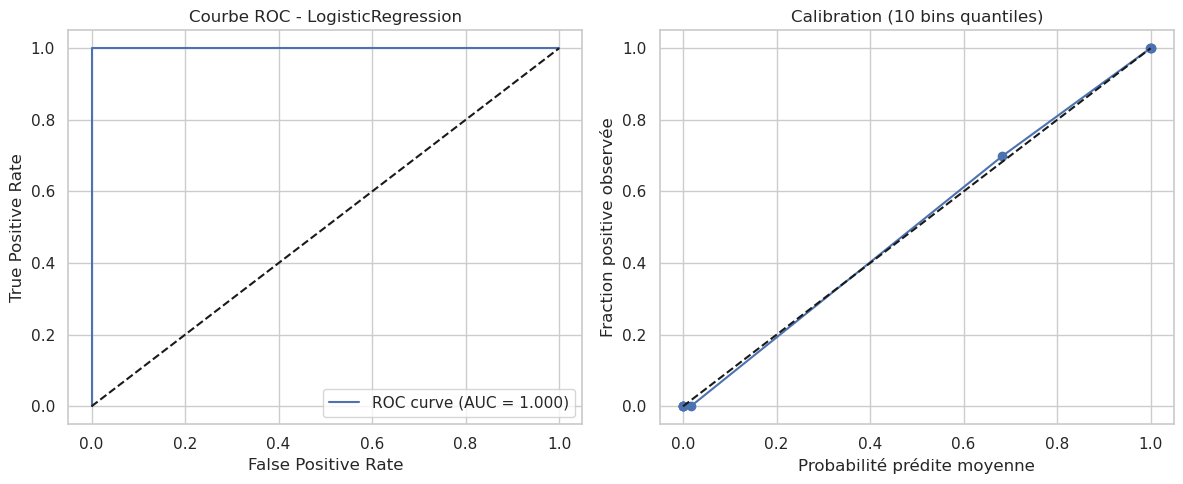

In [27]:
# Diagnostics du modèle logistique (ROC et calibration)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import calibration_curve

fpr, tpr, _ = roc_curve(y_bin, y_pred_log_proba)
roc_auc = roc_auc_score(y_bin, y_pred_log_proba)
prob_true, prob_pred = calibration_curve(y_bin, y_pred_log_proba, n_bins=10, strategy='quantile')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Courbe ROC - LogisticRegression')
axes[0].legend(loc='lower right')

axes[1].plot(prob_pred, prob_true, marker='o')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('Probabilité prédite moyenne')
axes[1].set_ylabel('Fraction positive observée')
axes[1].set_title('Calibration (10 bins quantiles)')

plt.tight_layout()
plt.show()

### Projection PCA et coloration par `FloodProbability`
Cette section projette les features normalisées sur les deux premières composantes principales et colore les points selon la probabilité d'inondation.

In [14]:
# PCA sur les features numériques et scatter coloré par FloodProbability
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# S'assurer que les features et la cible sont alignées
X_valid = X.copy()
y_continuous = y.loc[X_valid.index]

scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_valid)
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X_pca_scaled)
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'], index=X_valid.index)
pca_df['FloodProbability'] = y_continuous

print('Variance expliquée PC1:', pca.explained_variance_ratio_[0])
print('Variance expliquée PC2:', pca.explained_variance_ratio_[1])
print('Variance cumulée:', pca.explained_variance_ratio_.sum())

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df['FloodProbability'],
    cmap='viridis',
    alpha=0.7
 )
cbar = plt.colorbar(scatter)
cbar.set_label('FloodProbability')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA des features (colorée par FloodProbability)')
plt.tight_layout()
plt.show()

NameError: name 'X' is not defined

### Embedding supervisée pour accentuer les écarts de probabilité
La LDA suivante utilise 4 bins de `FloodProbability` pour pousser les points très éloignés dans la cible à s'écarter plus fortement dans le nouvel espace linéaire tout en conservant une combinaison des features d'origine.

In [ ]:
# Embedding linéaire qui étire les distances pour les différences de probabilité
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

aligned_y = y.loc[X.index]
prob_bins = pd.qcut(aligned_y, q=4, labels=False, duplicates='drop')

scaler_embed = StandardScaler()
X_embed = scaler_embed.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
embeddings = lda.fit_transform(X_embed, prob_bins)

embed_df = pd.DataFrame(embeddings, columns=['LD1', 'LD2'], index=X.index)
embed_df['FloodProbability'] = aligned_y
embed_df['prob_bin'] = prob_bins

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    embed_df['LD1'],
    embed_df['LD2'],
    c=embed_df['FloodProbability'],
    cmap='plasma',
    alpha=0.75,
    s=40,
    edgecolors='w',
    linewidth=0.4
)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('FloodProbability')
ax.set_title('Projection LDA supervisée (4 bins)')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

prob_diff = pairwise_distances(aligned_y.values.reshape(-1, 1), metric='manhattan')
embedding_dist = pairwise_distances(embeddings, metric='euclidean')
far_threshold = np.quantile(prob_diff, 0.75)
near_threshold = np.quantile(prob_diff, 0.25)
non_diag = ~np.eye(len(prob_diff), dtype=bool)
far_mask = (prob_diff >= far_threshold) & non_diag
near_mask = (prob_diff <= near_threshold) & non_diag

if far_mask.sum() and near_mask.sum():
    print(f'Distance moyenne (prob. éloignées >= {far_threshold:.3f}): {embedding_dist[far_mask].mean():.3f}')
    print(f'Distance moyenne (prob. proches <= {near_threshold:.3f}): {embedding_dist[near_mask].mean():.3f}')
else:
    print('Pas assez de paires pour mesurer la distance binaire', far_mask.sum(), near_mask.sum())

print('Explained variance ratio (LDA):', lda.explained_variance_ratio_)
print('Répartition par bin:', prob_bins.value_counts().sort_index().to_dict())

loadings = pd.DataFrame(
    lda.scalings_,
    index=X.columns,
    columns=['LD1 weight', 'LD2 weight']
)
loadings['abs_LD1'] = loadings['LD1 weight'].abs()
loadings.sort_values('abs_LD1', ascending=False, inplace=True)
display(loadings[['LD1 weight', 'LD2 weight']].head(12))